# Prediction using Supervised ML

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# To read the dataset
data = pd.read_csv('http://bit.ly/w-data')


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# To find the number of columns and rows(Dimension)
data.shape

(25, 2)

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# To find more information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# To check missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No null values(missing values) in the data set.

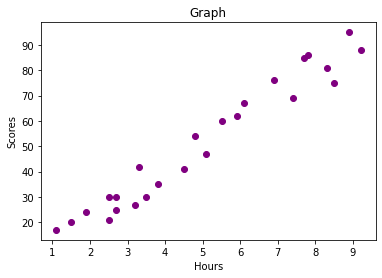

In [9]:
# Visualizing  the data set
plt.scatter(data["Hours"],data["Scores"],color='purple')
plt.title("Graph")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

From the graph we can conclude that there is positive linear relation between 'hours studied' and 'Percentage Score'.

In [10]:
# Dividing the data to independent and dependent variables
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

To split the data into training and test sets we will be using Scikit-Learn's built-in train_test_split() method.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
# to train the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fitting the model
regressor.fit(X_train, Y_train)

print("Training complete")

Training complete


In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

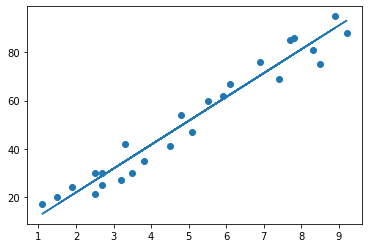

In [15]:
# Plotting the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [16]:
#  Retrieving intercept and coefficients 
print("Intercept is : ",regressor.intercept_)
print("Coefficient is : ",regressor.coef_)

Intercept is :  2.018160041434662
Coefficient is :  [9.91065648]


In [17]:
# testing data in hours
print(X_test)
# Predicting the scores
Y_pred = regressor.predict(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


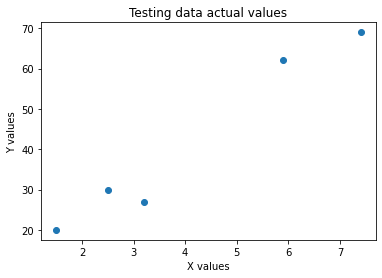

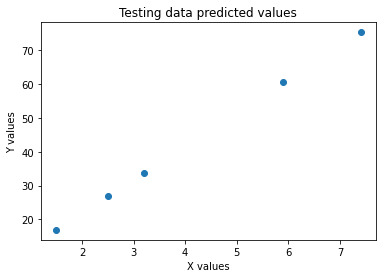

In [19]:
# Visualising predicted and actual values
plt.scatter(X_test,Y_test)
plt.title("Testing data actual values")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

plt.scatter(X_test,Y_pred)
plt.title("Testing data predicted values")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

In [20]:
# Evaluating the model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean squared Error:', metrics.mean_squared_error(Y_test,Y_pred))


Mean Absolute Error: 4.183859899002982
Mean squared Error: 21.598769307217456


In [21]:
# To predict the score of the student who studies for 9.25 hours/day
hours=9.25
score_pred = regressor.predict([[hours]])
print("score for 9.25 hours : ",score_pred)

score for 9.25 hours :  [93.69173249]
